In [45]:
from deap import base, creator, tools
import numpy as np
import re
import random
import datetime

In [75]:
class Scrabble(object):
    LETTERS_VALUES_FREQS = {
        0:  {'?': 2},
        1:  {'E': 12, 'A': 9, 'I': 9, 'O': 8, 'N': 6, 'R': 6, 'T': 6, 'L': 4, 'S': 4, 'U': 4},
        2:  {'D': 4, 'G': 3},
        3:  {'B': 2, 'C': 2, 'M': 2, 'P': 2},
        4:  {'F': 2, 'H': 2, 'V': 2, 'W': 2, 'Y': 2},
        5:  {'K': 1},
        8:  {'J': 1, 'X': 1},
        10: {'Q': 1, 'Z': 1}
    }

    def __init__(self):
        self.values, self.letters = self._set_values()
        self.words = self._set_words()
        self.re_blank = re.compile('\?')
        self.score_cache = {}

    def _set_values(self):
        values = {}
        l = []
        for value, freq in Scrabble.LETTERS_VALUES_FREQS.items():
            for letter, count in freq.items():
                letter = letter.lower()
                values[letter] = value
                for _ in range(count):
                    l.append(letter)
            letters = "".join(np.array(l))
        return values, letters

    def _set_words(self):
        words = {}
        with open('enable1.txt') as fh:
            for line in fh:
                w = line.strip()
                r = re.compile("".join(["["+l+"?]" for l in w]))
                words[w] = r
        return words

    def score_word(self, word):
        return sum([self.values[l] for l in word])

    def letter2i(self, l):
        return ord(l)-ord('a')

    def shuffle(self, s):
        w = list(s)
        random.shuffle(w)
        return "".join(w)

    def create_random(self):
        return self.shuffle(self.letters)

    def create_string(self, indices):
        s = []
        for i in indices:
            s.append(self.letters[i])
        return "".join(s)
    
    def calc_score(self, indices):
        s=self.create_string(indices)
        
        if s in self.score_cache:
            return self.score_cache[s]
        
        bpos=[]
        for b in self.re_blank.finditer(s):
            bpos.append(b.start(0))
        bpos.sort()
        #print(bpos)

        scores = np.zeros(shape=(26,26))

        for w, r in self.words.items():
            matches = r.finditer(s)
            for m in matches:
                wm = m.group(0)
                wi = m.start(0)
                wv = self.score_word(wm)
                #print("%s %s pos=%d value=%d" % (w, wm, wi, wv))
                blanks = self.re_blank.finditer(wm)
                bi_local = []
                bl_local = []
                for b in blanks:
                    bi = b.start(0)
                    tbi = wi + bi
                    bl = w[bi:bi+1]
                    #print ("    ", tbi, bl)
                    bi_local.append(tbi)
                    bl_local.append(bl)
                #print("    ",bi_local)
                #print("    ",bl_local)
                bi_local_len = len(bi_local)

                if bi_local_len == 0:
                    scores[:,:] += wv
                elif len(bi_local) == 1:
                    if bi_local[0] == bpos[0]:
                        scores[self.letter2i(bl_local[0]),:] += wv
                    elif bi_local[0] == bpos[1]:
                        scores[:,self.letter2i(bl_local[0])] += wv
                elif len(bi_local) == 2:
                    scores[self.letter2i(bl_local[0]),self.letter2i(bl_local[1])] += wv

        #print(scores)
        score = scores.max()
        self.score_cache[s] = score
        return score

In [76]:
s = Scrabble()

In [84]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("indices", random.sample, range(len(s.letters)), len(s.letters))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", s.calc_score)

#toolbox.evaluate(x[0])

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.02)
toolbox.register("select", tools.selTournament, tournsize=10)

In [78]:
pop = toolbox.population(10)
pop

[[28,
  25,
  62,
  95,
  97,
  84,
  37,
  86,
  54,
  51,
  90,
  33,
  79,
  42,
  44,
  38,
  81,
  23,
  12,
  6,
  9,
  59,
  10,
  57,
  0,
  69,
  87,
  46,
  35,
  64,
  17,
  50,
  3,
  18,
  56,
  61,
  45,
  60,
  85,
  29,
  82,
  14,
  2,
  58,
  26,
  13,
  22,
  72,
  68,
  21,
  47,
  19,
  88,
  94,
  48,
  5,
  34,
  31,
  40,
  78,
  77,
  20,
  91,
  67,
  52,
  89,
  11,
  43,
  32,
  30,
  24,
  36,
  39,
  98,
  4,
  76,
  8,
  53,
  92,
  99,
  1,
  7,
  70,
  93,
  16,
  96,
  55,
  73,
  63,
  49,
  74,
  15,
  66,
  80,
  83,
  65,
  41,
  75,
  71,
  27],
 [48,
  45,
  80,
  23,
  9,
  89,
  59,
  73,
  70,
  22,
  35,
  82,
  18,
  29,
  19,
  85,
  6,
  8,
  34,
  79,
  51,
  25,
  97,
  88,
  84,
  58,
  33,
  10,
  52,
  1,
  99,
  74,
  2,
  0,
  32,
  42,
  3,
  28,
  62,
  64,
  56,
  96,
  68,
  40,
  37,
  20,
  94,
  54,
  11,
  87,
  16,
  47,
  61,
  13,
  93,
  77,
  7,
  17,
  46,
  14,
  69,
  50,
  27,
  71,
  83,
  5,
  53,
  65,
  55,
  91

In [80]:
toolbox.evaluate(pop[0])

150.0

In [12]:
def create_string(indices, master):
    s = []
    for i in indices:
        s.append(master[i])
    return "".join(s)

In [13]:
create_string(pi, s.letters)

'aonelerntojociaistuxirivvyabiepaeauamis?rqakuapthlwrhrireeyglenconwioubtzsoods?omentlfgdeaeedgedfnit'

In [81]:
class Runner:
    
    def __init__(self, toolbox):
        self.toolbox = toolbox
        self.set_parameters(10, 5, 2)
        
    def set_parameters(self, population_size, iterations, n_matings):
        self.iterations = iterations
        self.population_size = population_size
        self.n_matings = n_matings
        
    def set_fitness(self, population):
        fitnesses = [ 
            (individual, self.toolbox.evaluate(individual)) 
            for individual in population 
        ]

        for individual, fitness in fitnesses:
            individual.fitness.values = (fitness,)
            
    def get_offspring(self, population):
        n = len(population)
        for _ in range(self.n_matings):
            i1, i2 = np.random.choice(range(n), size=2, replace=False)

            offspring1, offspring2 = \
                self.toolbox.mate(population[i1], population[i2])
            
            yield self.toolbox.mutate(offspring1)[0]
            yield self.toolbox.mutate(offspring2)[0]
    
    @staticmethod
    def pull_stats(population, iteration=1):
        fitnesses = [ individual.fitness.values[0] for individual in population ]
        return {
            'i': iteration,
            'mu': np.mean(fitnesses),
            'std': np.std(fitnesses),
            'max': np.max(fitnesses),
            'min': np.min(fitnesses)
        }  
    
    @staticmethod
    def seconds_elapsed(start):
        diff = datetime.datetime.now() - start
        return diff.days * 24 * 3600 + diff.seconds
        
    def Run(self):
        start = datetime.datetime.now()
        population = self.toolbox.population(n=self.population_size)
        self.set_fitness(population)
        
        print("set_fitness() on init pop, elapsed=%d s" % (Runner.seconds_elapsed(start)))
        
        stats = []
        for iteration in list(range(1, self.iterations + 1)):
            current_population = list(map(self.toolbox.clone, population))
            offspring = list(self.get_offspring(current_population))            
            for child in offspring:
                current_population.append(child)
            
            ## reset fitness,
            self.set_fitness(current_population)
            
            population[:] = self.toolbox.select(current_population, len(population))
            stats.append(
                Runner.pull_stats(population, iteration))
            print("completed iteration %d, elapsed=%d s" % (iteration, Runner.seconds_elapsed(start)))
            
        return stats, population

In [85]:
POPULATION_SIZE = 200
N_ITERATIONS = 1000
N_MATINGS = 50

a = Runner(toolbox)
a.set_parameters(POPULATION_SIZE, N_ITERATIONS, N_MATINGS)

In [86]:
stats, population = a.Run()

set_fitness() on init pop, elapsed=44 s
completed iteration 1, elapsed=62 s
completed iteration 2, elapsed=80 s
completed iteration 3, elapsed=98 s
completed iteration 4, elapsed=119 s
completed iteration 5, elapsed=139 s
completed iteration 6, elapsed=156 s
completed iteration 7, elapsed=173 s
completed iteration 8, elapsed=189 s
completed iteration 9, elapsed=204 s
completed iteration 10, elapsed=221 s
completed iteration 11, elapsed=236 s
completed iteration 12, elapsed=250 s
completed iteration 13, elapsed=264 s
completed iteration 14, elapsed=281 s
completed iteration 15, elapsed=297 s
completed iteration 16, elapsed=312 s
completed iteration 17, elapsed=327 s
completed iteration 18, elapsed=342 s
completed iteration 19, elapsed=357 s
completed iteration 20, elapsed=371 s
completed iteration 21, elapsed=385 s
completed iteration 22, elapsed=399 s
completed iteration 23, elapsed=414 s
completed iteration 24, elapsed=427 s
completed iteration 25, elapsed=443 s
completed iteration 26

KeyboardInterrupt: 

In [71]:
stats[-1]

{'i': 500, 'mu': 882.0, 'std': 0.0, 'max': 882.0, 'min': 882.0}

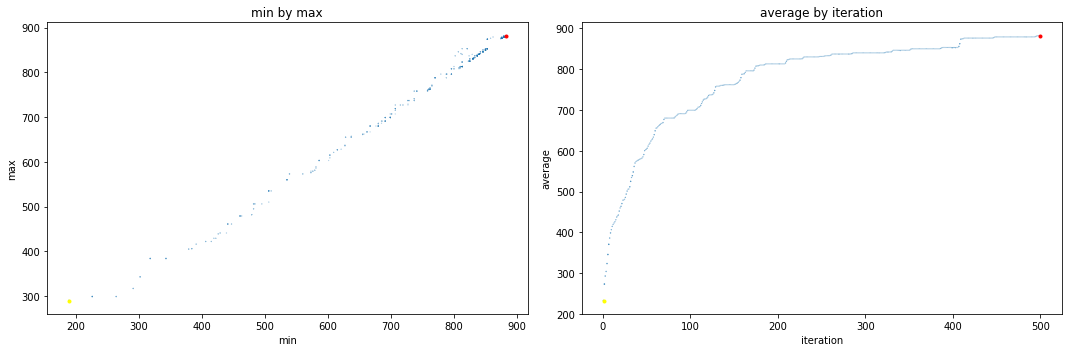

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)

_ = plt.scatter([ s['min'] for s in stats ], [ s['max'] for s in stats ], marker='.', s=[ (s['std'] + 1) / 20 for s in stats ])

_ = plt.title('min by max')
_ = plt.xlabel('min')
_ = plt.ylabel('max')

_ = plt.plot(stats[0]['min'], stats[0]['max'], marker='.', color='yellow')
_ = plt.plot(stats[-1]['min'], stats[-1]['max'], marker='.', color='red')


plt.subplot(1,2,2)

_ = plt.scatter([ s['i'] for s in stats ], [ s['mu'] for s in stats ], marker='.', s=[ (s['std'] + 1) / 20 for s in stats ])

_ = plt.title('average by iteration')
_ = plt.xlabel('iteration')
_ = plt.ylabel('average')

_ = plt.plot(stats[0]['i'], stats[0]['mu'], marker='.', color='yellow')
_ = plt.plot(stats[-1]['i'], stats[-1]['mu'], marker='.', color='red')

plt.tight_layout()
plt.show()

In [70]:
s.create_string(population[20])

'abyetinv?revetoroweregadimojotaxishamaillulloikatagorangenuizititheyenspawn?fiferspendsuqboreducedoc'

In [74]:
fitnesses = sorted([ 
    (i, toolbox.evaluate(individual)) 
    for i, individual in enumerate(population) 
], key=lambda x: x[1])

fitnesses[:5]

[(0, 882.0), (1, 882.0), (2, 882.0), (3, 882.0), (4, 882.0)]